<a href="https://colab.research.google.com/github/dantepawn/data_viz/blob/master/covi19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Required

In [1]:
!pip install geopandas

     |████████████████████████████████| 931kB 2.8MB/s 
     |████████████████████████████████| 10.4MB 54.8MB/s 
     |████████████████████████████████| 14.7MB 311kB/s 


In [0]:
#dependencies
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import datetime 
import folium
from folium.plugins import  HeatMap

# Data

In [0]:
days = ['06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','01']
#or 


In [0]:
def create_df(days):
  '''for each day in days collect the data of ''' 
  df = pd.DataFrame()

  for i in days:
    url =  'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province-202003{}.csv'.format(i)
  #df.append(pd.read_csv(url, encoding= 'Latin'))
    df = pd.concat([df,pd.read_csv(url, encoding="Latin")])
    df.data = pd.to_datetime(df.data , yearfirst=True)
    df = df[df['codice_provincia'].map(lambda x :len(str(x)) < 3)]
    #rename regions
    df['denominazione_regione'] = df['denominazione_regione'].mask(df['denominazione_regione']=='P.A. Bolzano', 'Trentino-Alto Adige')
    df['denominazione_regione'] = df['denominazione_regione'].mask(df['denominazione_regione']=='P.A. Trento', 'Trentino-Alto Adige')
  return df


In [0]:
#region shape json file
regioni_url = 'https://gist.github.com/datajournalism-it/48e29e7c87dca7eb1d29/raw/2636aeef92ba0770a073424853f37690064eb0ea/regioni.geojson'
regioni = gpd.read_file(regioni_url)
regioni.rename(columns={'NOME_REG':'denominazione_regione'},inplace=True)

In [11]:
df = create_df(days)
df.shape

(2673, 12)

In [0]:
#pd.DataFrame(regioni).to_json('regioni.json')

In [12]:
df.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
0,2020-03-06 18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,3.0,NaN,NaN
1,2020-03-06 18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,1.0,NaN,NaN
2,2020-03-06 18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,1.0,NaN,NaN
3,2020-03-06 18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,4.0,NaN,NaN
5,2020-03-06 18:00:00,ITA,17,Basilicata,77,Matera,MT,40.667512,16.597924,1.0,NaN,NaN


merge with each region shape

In [0]:
#merge df with regions to include the geo
gdf = df.merge(regioni , on = ['denominazione_regione'])

In [0]:
gdf.set_index('data',inplace=True)


In [0]:
gdf.head(2)

,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en,geometry
data,,,,,,,,,,,,
2020-03-06 18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,3.0,NaN,NaN,"MULTIPOLYGON (((13.92027 42.89005, 13.92045 42..."
2020-03-06 18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,1.0,NaN,NaN,"MULTIPOLYGON (((13.92027 42.89005, 13.92045 42..."


In [0]:
df.reset_index().totale_casi

0          3
1          1
2          1
3          4
4          4
        ... 
2155     125
2156    1402
2157    1067
2158    1876
2159    1104
Name: totale_casi, Length: 2160, dtype: object

In [0]:
#example case
df_cases = df[(df['denominazione_provincia'] == 'Roma') | 
   (df['denominazione_provincia'] == 'Bergamo') | 
   (df['denominazione_provincia'] == 'Milano') |
   (df['denominazione_provincia'] == 'Bologna')|
   (df['denominazione_provincia'] == 'Catania')] 


In [18]:
df_cases.shape

(135, 12)

In [0]:
df_cases=df_cases.set_index('data')

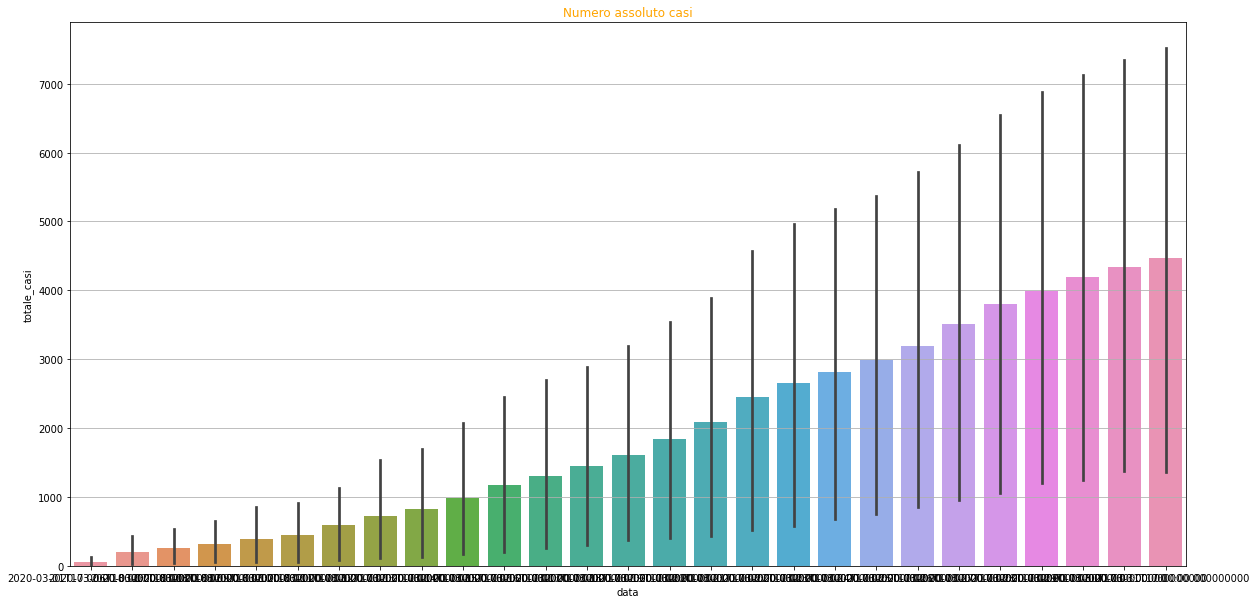

In [25]:
citta = ['Roma','Milano','Bergamo','Catania','Bologna']
plt.figure(figsize = (20,10))
plt.title('Numero assoluto casi', color = 'orange')
plt.xticks([])
  #plt.title(citta[i-1], color = 'orange')
plt.grid(axis = 'y')
sn.barplot(x = df_cases.index , y = 'totale_casi'   , data = df_cases )

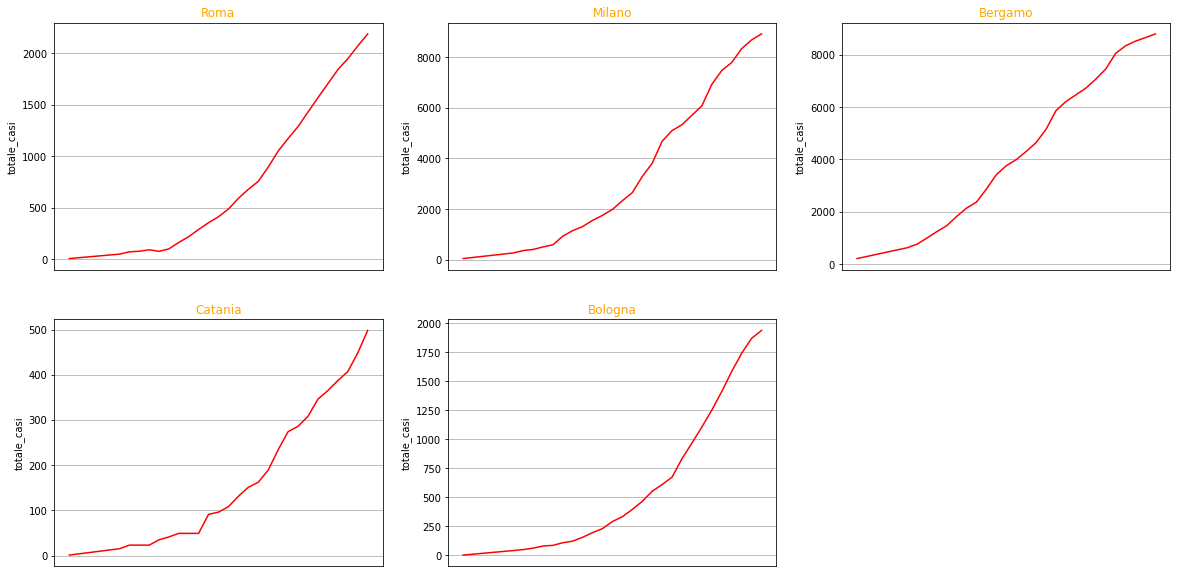

In [23]:
citta = ['Roma','Milano','Bergamo','Catania','Bologna']
plt.figure(figsize = (20,10))
plt.title('Numero assoluto casi', color = 'orange')

for i in range(1,len(citta)+1):
  plt.subplot(2,3,i)
  data= df_cases[df_cases['denominazione_provincia'] == citta[i-1] ] 
  plt.xticks([])
  plt.title(citta[i-1], color = 'orange')
  plt.grid(axis = 'y')
  
  sn.lineplot(x = data.index , y = 'totale_casi' , data = data ,color= 'red', legend='full')

In [0]:
total = []
for d in days :
  total.append(df['2020-03-{}'.format(d)].totale_casi.sum())


In [0]:
dd = pd.date_range('2020-3-6' , periods = len(days))

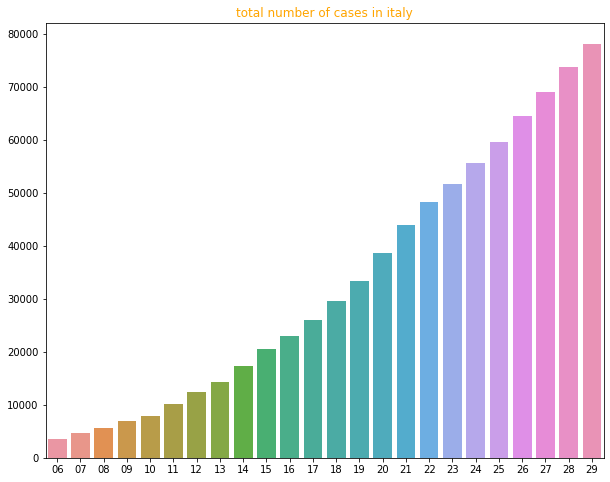

In [0]:
plt.figure(figsize=(10,8))
plt.title('total number of cases in italy' , color = 'orange')
sn.barplot(x = days  , y = total )

In [28]:
df_cases.head(1)

,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
data,,,,,,,,,,,
2020-03-06 18:00:00,ITA,8,Emilia-Romagna,37,Bologna,BO,44.494367,11.341721,41.0,NaN,NaN


In [0]:
data= df_cases[df_cases['denominazione_provincia'] == citta[i] ]
numbers = data.totale_casi.values


In [30]:
numbers

array([  41.,   49.,   62.,   80.,   86.,  108.,  122.,  155.,  195.,
        230.,  291.,  333.,  395.,  465.,  552.,  610.,  674.,  833.,
        968., 1107., 1253., 1413., 1586., 1743., 1872., 1940.,    2.])

In [34]:
100*(numbers - np.pad(numbers, 1)[:-2])/numbers

array([   100.        ,     16.32653061,     20.96774194,     22.5       ,
            6.97674419,     20.37037037,     11.47540984,     21.29032258,
           20.51282051,     15.2173913 ,     20.96219931,     12.61261261,
           15.69620253,     15.05376344,     15.76086957,      9.50819672,
            9.49554896,     19.08763505,     13.94628099,     12.5564589 ,
           11.65203512,     11.32342534,     10.90794451,      9.00745841,
            6.89102564,      3.50515464, -96900.        ])

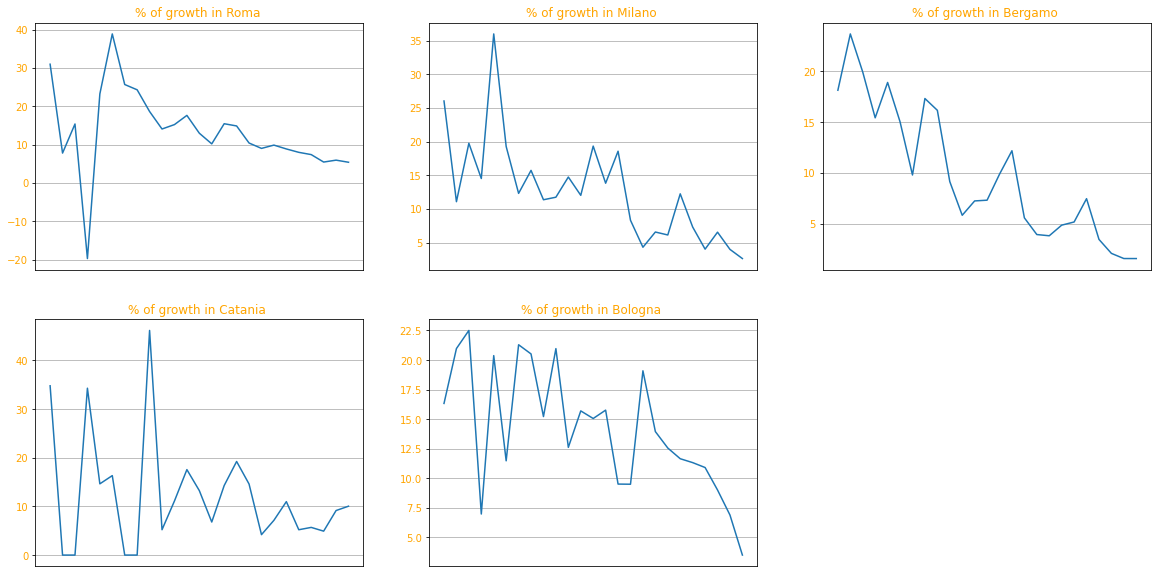

In [38]:
citta = ['Roma','Milano','Bergamo','Catania','Bologna']
plt.figure(figsize = (20,10))

for i in range(0,len(citta)):
  plt.subplot(2,3,i+1)
  data= df_cases[df_cases['denominazione_provincia'] == citta[i] ] 
  
  numbers = data.totale_casi.values
  np.set_printoptions(suppress= True)
  perc = (numbers - np.pad(numbers, 1)[:-2])/numbers
  plt.title('% of growth in {} '.format(citta[i]), color = 'orange')
  plt.grid(which = 'both',axis = 'y' )
  plt.yticks(color= 'orange')
  plt.xticks([])
  plt.plot(100*perc[1:-1])

# Folium visualization


In [0]:

base = folium.Map(location= (41.9028, 12.4964), tiles = 'Stamentoner' , zoom_start = 6 )


In [0]:
df.head(2)

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
0,2020-03-06 18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,3.0,NaN,NaN
1,2020-03-06 18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,1.0,NaN,NaN


In [13]:
when = '2020-03-30'
base = folium.Map(location= (41.9028, 12.4964), tiles = 'Stamentoner' , zoom_start = 6 )
for i , row in df[when].iterrows():
  folium.Circle(location=(row.lat,row.long) , radius = row.totale_casi*10 , color = 'green' ,fill = True  ).add_to(base)

NameError: ignored

In [0]:
base


# Plot by regions

In [0]:
df[when].denominazione_regione.unique()

NameError: ignored

In [0]:
len(df[when].denominazione_regione.unique()) , len(regioni.NOME_REG)

(21, 20)

In [0]:
#df = df.where(df['denominazione_regione'].any( ['P.A. Bolzano' , 'P.A. Trento']),other ='Trentino-Alto Adige' ) 


In [0]:
df.columns

Index(['stato', 'codice_regione', 'denominazione_regione', 'codice_provincia',
       'denominazione_provincia', 'sigla_provincia', 'lat', 'long',
       'totale_casi', 'note_it', 'note_en', 'geometry'],
      dtype='object')

In [0]:
df_grouped = df.groupby(['data','denominazione_regione'])['totale_casi'].sum()
df_grouped

data                 denominazione_regione
2020-03-06 18:00:00  Abruzzo                     9.0
                     Basilicata                  3.0
                     Calabria                    4.0
                     Campania                   17.0
                     Emilia-Romagna            870.0
                                               ...  
2020-03-31 17:00:00  Toscana                  4350.0
                     Trentino-Alto Adige      3117.0
                     Umbria                   1043.0
                     Valle d'Aosta             628.0
                     Veneto                   8876.0
Name: totale_casi, Length: 520, dtype: float64

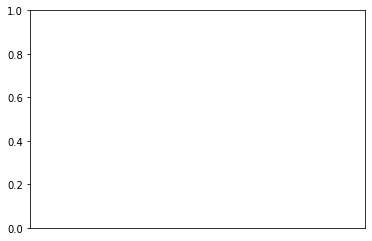

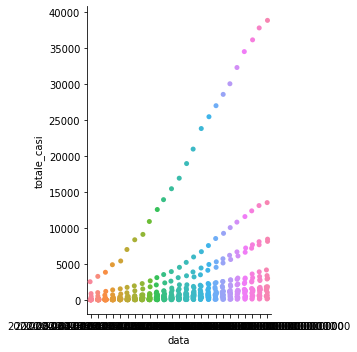

In [0]:
sn.catplot(x='data',y = 'totale_casi',data= df_grouped.reset_index())# dfgrouped

In [0]:
df_grouped.reset_index().set_index('data')['2020-03-27']

,denominazione_regione,totale_casi
data,,
2020-03-27 17:00:00,Abruzzo,1017.0
2020-03-27 17:00:00,Basilicata,151.0
2020-03-27 17:00:00,Calabria,383.0
2020-03-27 17:00:00,Campania,1354.0
2020-03-27 17:00:00,Emilia-Romagna,11588.0
2020-03-27 17:00:00,Friuli Venezia Giulia,1309.0
2020-03-27 17:00:00,Lazio,2273.0
2020-03-27 17:00:00,Liguria,1467.0
2020-03-27 17:00:00,Lombardia,34545.0


In [0]:
df_grouped = df.groupby(['data','denominazione_regione'])['totale_casi'].sum()
df_target = df_grouped.reset_index().set_index('data')['2020-03-29']
df_target = pd.DataFrame(df_target)

In [0]:
df_target.set_index('denominazione_regione')

,totale_casi
denominazione_regione,
Abruzzo,1293.0
Basilicata,202.0
Calabria,483.0
Campania,1647.0
Emilia-Romagna,13119.0
Friuli Venezia Giulia,1471.0
Lazio,2691.0
Liguria,1732.0
Lombardia,37841.0


In [0]:
#check all the region names correspond 
for v in df_target.denominazione_regione:
  if v in regioni.denominazione_regione.values :
    print(True)
  else:
    print(False)  


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [0]:
#bins = list(df_target['totale_casi'].quantile([0, 0.25, 0.5, 0.75, 1]))

In [0]:
#help(folium.Choropleth)

In [0]:
regioni.to_file("regioni.geojson", driver='GeoJSON')

so the geo_data flag has to be a json file ?? , so download the file and use the address


In [108]:
df_target.head()

,denominazione_regione,totale_casi
data,,
2020-03-29 17:00:00,Abruzzo,1293.0
2020-03-29 17:00:00,Basilicata,202.0
2020-03-29 17:00:00,Calabria,483.0
2020-03-29 17:00:00,Campania,1647.0
2020-03-29 17:00:00,Emilia-Romagna,13119.0


In [111]:
base = folium.Map(location= (41.9028, 12.4964) , zoom_start = 6 )
#base = folium.Map(location= (41.9028, 12.4964), tiles = 'Stamentoner' , zoom_start = 6 )
#bins = list(df_target['totale_casi'].quantile([0, 0.25, 0.5, 0.75, 1]))



folium.Choropleth(
    geo_data = "regioni.geojson",
    name = 'choropleth',
    data = df_target,
    columns = ['denominazione_regione','totale_casi'] ,
    key_on ='regioni.denominazione_regione',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Casi Totali',
    
    
).add_to(base)

folium.LayerControl().add_to(base)

base

AttributeError: ignored

In [0]:
series_target = df_target.set_index('denominazione_regione')

In [0]:
series_target.iloc[:,0]

denominazione_regione
Abruzzo                   1293.0
Basilicata                 202.0
Calabria                   483.0
Campania                  1647.0
Emilia-Romagna           13119.0
Friuli Venezia Giulia     1471.0
Lazio                     2691.0
Liguria                   1732.0
Lombardia                37841.0
Marche                    3251.0
Molise                     117.0
Piemonte                  7666.0
Puglia                    1385.0
Sardegna                   583.0
Sicilia                   1460.0
Toscana                   3901.0
Trentino-Alto Adige       2808.0
Umbria                     993.0
Valle d'Aosta              584.0
Veneto                    8094.0
Name: totale_casi, dtype: float64

In [0]:
base = folium.Map(location= (41.9028, 12.4964) , zoom_start = 6 )
#base = folium.Map(location= (41.9028, 12.4964), tiles = 'Stamentoner' , zoom_start = 6 )
#bins = list(df_target['totale_casi'].quantile([0, 0.25, 0.5, 0.75, 1]))



folium.Choropleth(
    geo_data = regioni.__geo_interface__,
    name = 'choropleth',
    data = series_target.iloc[:,0],
    #columns = ['denominazione_regione','totale_casi'] ,
    key_on ='feature.denominazione_regione',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Casi Totali',
    
    
).add_to(base)

folium.LayerControl().add_to(base)

#base

# Geopandas visualization


In [0]:
df = create_df(days)
gdf = df.merge(regioni , on = ['denominazione_regione'])
gdf = gdf.set_index('data')

In [52]:
gdf.head()

,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en,geometry
data,,,,,,,,,,,,
2020-03-06 18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,3.0,NaN,NaN,"MULTIPOLYGON (((13.92027 42.89005, 13.92045 42..."
2020-03-06 18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,1.0,NaN,NaN,"MULTIPOLYGON (((13.92027 42.89005, 13.92045 42..."
2020-03-06 18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,1.0,NaN,NaN,"MULTIPOLYGON (((13.92027 42.89005, 13.92045 42..."
2020-03-06 18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,4.0,NaN,NaN,"MULTIPOLYGON (((13.92027 42.89005, 13.92045 42..."
2020-03-07 18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,4.0,NaN,NaN,"MULTIPOLYGON (((13.92027 42.89005, 13.92045 42..."


In [0]:
gdf_reg = gdf['2020-03-26'].groupby(['denominazione_regione'])['totale_casi'].sum()

In [0]:
gdf_reg

denominazione_regione
Abruzzo                    946.0
Basilicata                 134.0
Calabria                   283.0
Campania                  1280.0
Emilia-Romagna           10816.0
Friuli Venezia Giulia     1215.0
Lazio                     2092.0
Liguria                   1331.0
Lombardia                32332.0
Marche                    2859.0
Molise                      94.0
Piemonte                  6106.0
Puglia                    1065.0
Sardegna                   473.0
Sicilia                   1164.0
Toscana                   3036.0
Trentino-Alto Adige       2203.0
Umbria                     778.0
Valle d'Aosta              408.0
Veneto                    6675.0
Name: totale_casi, dtype: float64

In [0]:
#taday is automatically set to yesteday
yesterday = datetime.date.today() -datetime.timedelta(2)
#gdf[str(today)]

def region_plot(day = yesterday):
  fig, ax = plt.subplots(figsize= (10,8))
  plt.xticks([])
  plt.yticks([])
  gdf_reg = gdf[str(day)].groupby(['denominazione_regione'])['totale_casi'].sum()
  gdf_reg = regioni.merge(gdf_reg , on ='denominazione_regione')
  gdf_reg.plot(column = 'totale_casi' , cmap = 'inferno' , legend =True  , ax = ax)



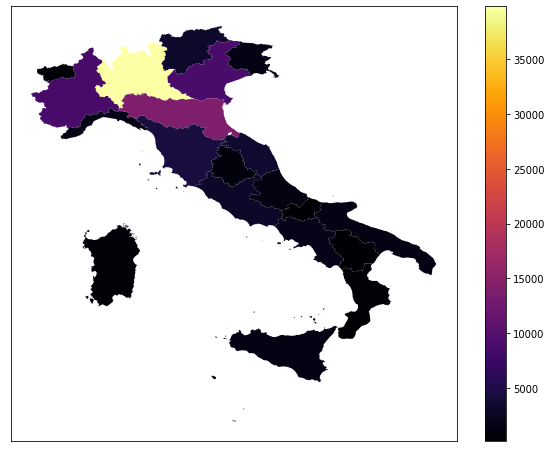

In [56]:
region_plot()

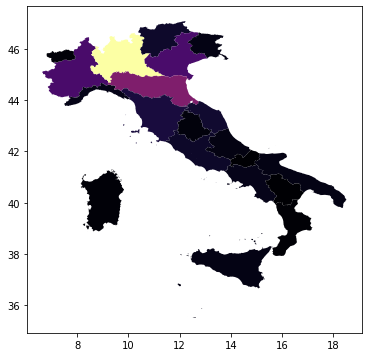

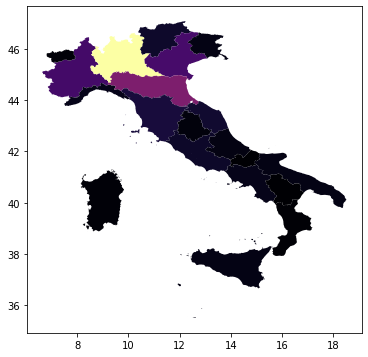

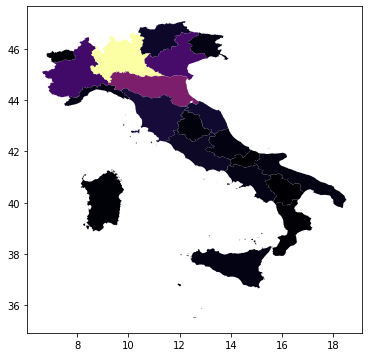

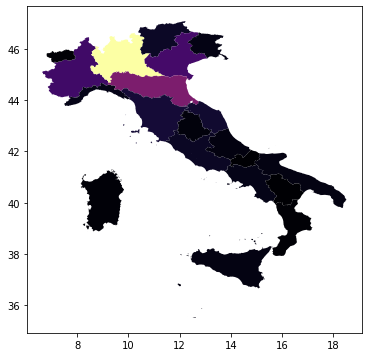

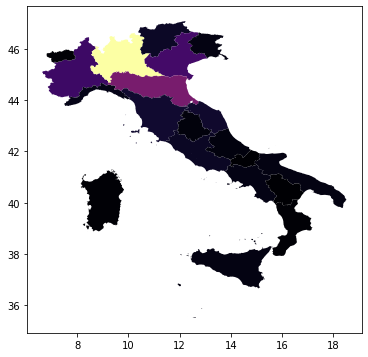

In [0]:
for i in range(0,5):
  region_plot(str(datetime.date.today()-datetime.timedelta(i+1)))

### growth rate per region

In [0]:
# growth rate per region over 3 days
gdf_reg1 = gdf['2020-03-12'].groupby(['denominazione_regione'])['totale_casi'].sum()
gdf_reg2 = gdf['2020-03-13'].groupby(['denominazione_regione'])['totale_casi'].sum()
gdf_reg3 = gdf['2020-03-14'].groupby(['denominazione_regione'])['totale_casi'].sum()
gdf_reg4 = gdf['2020-03-15'].groupby(['denominazione_regione'])['totale_casi'].sum()

(100*(gdf_reg4-gdf_reg3)/gdf_reg3 + 100*(gdf_reg3-gdf_reg2)/gdf_reg2 + 100*(gdf_reg2-gdf_reg1)/gdf_reg1) /4
#over 1 day
reg_growth = 100*(gdf_reg2-gdf_reg1)/gdf_reg1
average_growth = (100*(gdf_reg4-gdf_reg3)/gdf_reg3 + 100*(gdf_reg3-gdf_reg2)/gdf_reg2 + 100*(gdf_reg2-gdf_reg1)/gdf_reg1) /4

In [0]:
def region_growth_plot(reg_growth = reg_growth):
  fig, ax = plt.subplots(figsize= (10,8)  )

  plt.xticks([])
  plt.yticks([])
  gdf_reg= regioni.merge(reg_growth, on ='denominazione_regione')
  gdf_reg.plot(column = 'totale_casi' , cmap = 'inferno' , legend =True  , ax = ax , facecolor = 'grey')

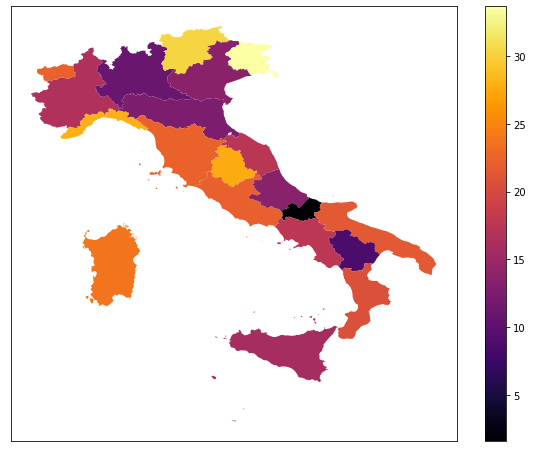

In [99]:
#3 days average growth
region_growth_plot(average_growth)

# Global trend

In [0]:
global_death_url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
global_confirmed_url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
global_recovered_url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
#gpd.read_file(global_url)

In [0]:
global_death_df  = pd.read_csv(global_death_url)
global_confirmed_df  = pd.read_csv(global_confirmed_url)
global_recovered_df  = pd.read_csv(global_recovered_url)


(256, 75)

In [0]:
global_death_df[global_death_df['Country/Region']=='Italy']
#global_death_df[global_death_df['Country/Region']=='Italy'].iloc[:,4:].values[0]
#global_death_df[global_death_df['Country/Region']=='Italy'].iloc[:,4:].values[0]
#global_url[global_df['Country/Region']=='Italy']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
137,NaN,Italy,43.0,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,7,10,12,17,21,29,34,52,79,107,148,197,233,366,463,631,827,827,1266,1441,1809,2158,2503,2978,3405,4032,4825,5476,6077,6820,7503,8215,9134,10023,10779,11591,12428


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


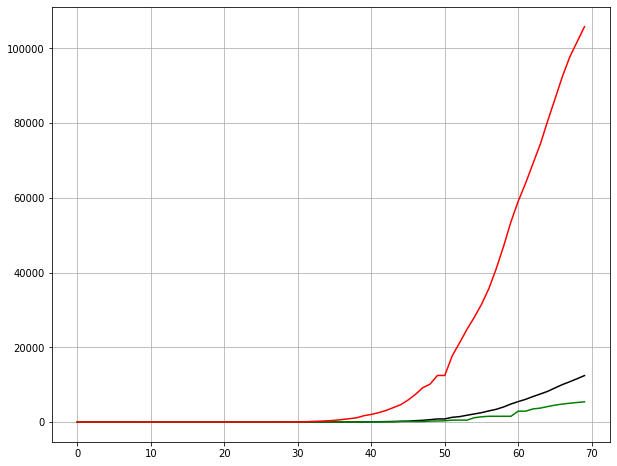

In [0]:
plt.figure(figsize = (10,8))
plt.plot(global_death_df[global_death_df['Country/Region']=='Italy'].iloc[:,4:].values[0] , c = 'black' ,  )
plt.plot(global_recovered_df[global_death_df['Country/Region']=='Italy'].iloc[:,4:].values[0] , c = 'green')
plt.plot(global_confirmed_df[global_death_df['Country/Region']=='Italy'].iloc[:,4:].values[0] , c = 'red')
plt.grid()

### Plot growth rate day to day to regions!!!

In [104]:
gpd.datasets.available

['naturalearth_lowres', 'naturalearth_cities', 'nybb']

In [0]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [0]:
world.loc[:,'name'].replace('United States of America','US' , inplace = True)
#world.loc[world.name == 'United States of America'] = 'US'

In [170]:
[x for x in global_confirmed_df.rename({'Country/Region':'name'} , axis = 1).name.values if 'U' in x]

['Uganda',
 'Ukraine',
 'United Arab Emirates',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'Uruguay',
 'US',
 'Uzbekistan',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom']

In [155]:
global_confirmed_df.rename({'Country/Region':'name'} , axis = 1).groupby('name')['3/31/20'].sum().index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Ukraine', 'United Arab Emirates', 'United Kingdom', 'Uruguay',
       'Uzbekistan', 'Venezuela', 'Vietnam', 'West Bank and Gaza', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='name', length=180)

In [0]:
world_global_confirmed = world.merge(global_confirmed_df.rename({'Country/Region':'name'} , axis = 1).groupby('name')['3/31/20'].sum() , on ='name')

In [0]:
world_global_confirmed['3/31/20'] = world_global_confirmed['3/31/20'].map(lambda x : np.log(x))


In [150]:
world_global_confirmed

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,3/31/20
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1.609438
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",2.944439
2,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",9.050993
3,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",5.837730
4,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",5.147494
...,...,...,...,...,...,...,...
140,11901484,Africa,Rwanda,RWA,21970.0,"POLYGON ((30.41910 -1.13466, 30.81613 -1.69891...",4.317488
141,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",6.802395
142,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",4.691348
143,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",4.718499


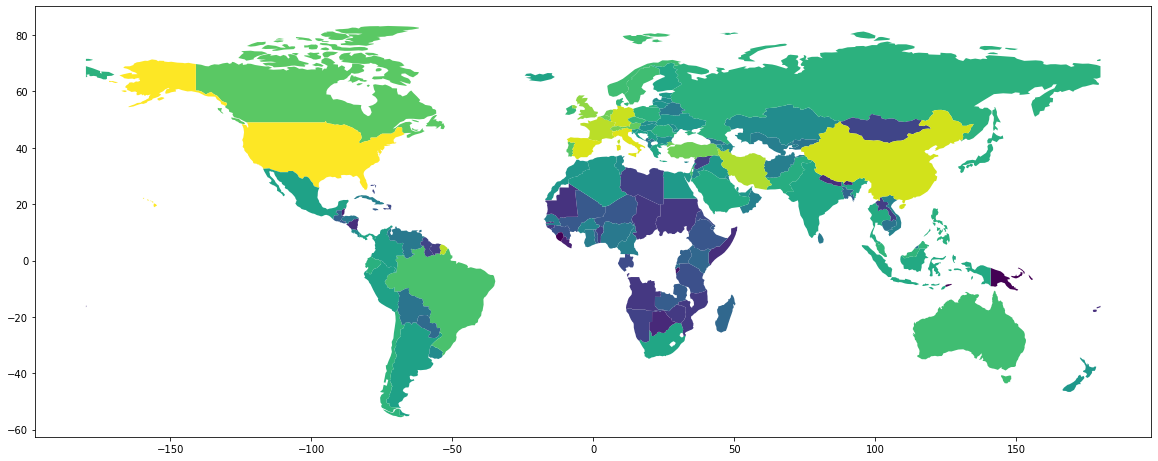

In [192]:
fig,ax= plt.subplots(figsize=(20,30))
world_global_confirmed.loc[:,['name','3/31/20','geometry']].plot(column ='3/31/20' , ax = ax )